In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
from skfuzzy import defuzz

## Exhaust Fan Controller
### -  is a mechanical ventilation device designed to remove stale air, odors, and contaminants from an enclosed space, typically by expelling them to the outside environment.

In [21]:
# Define the universe of discourse for each variable
temperature = np.arange(0, 56, 1)
air_quality = np.arange(0, 101, 1)
fan_speed = np.arange(0, 3.1, 0.1)

# Define the membership functions for input and output variables
temperature_verycold = fuzz.trapmf(temperature, [0, 0, 15, 20])
temperature_cold = fuzz.trimf(temperature, [15, 20, 25])
temperature_medium = fuzz.trimf(temperature, [20, 25, 30])
temperature_hot = fuzz.trimf(temperature, [25, 30, 35])
temperature_veryhot = fuzz.trapmf(temperature, [30, 35, 55, 55])

air_quality_low = fuzz.trimf(air_quality, [0, 0, 30])
air_quality_moderate = fuzz.trimf(air_quality, [20, 50, 80])
air_quality_high = fuzz.trimf(air_quality, [70, 100, 100])

fan_speed_off = fuzz.trimf(fan_speed, [0, 0, 1])
fan_speed_low = fuzz.trimf(fan_speed, [0, 1, 2])
fan_speed_medium = fuzz.trimf(fan_speed, [1, 2, 3])
fan_speed_high = fuzz.trapmf(fan_speed, [2, 3, 4, 4.1])

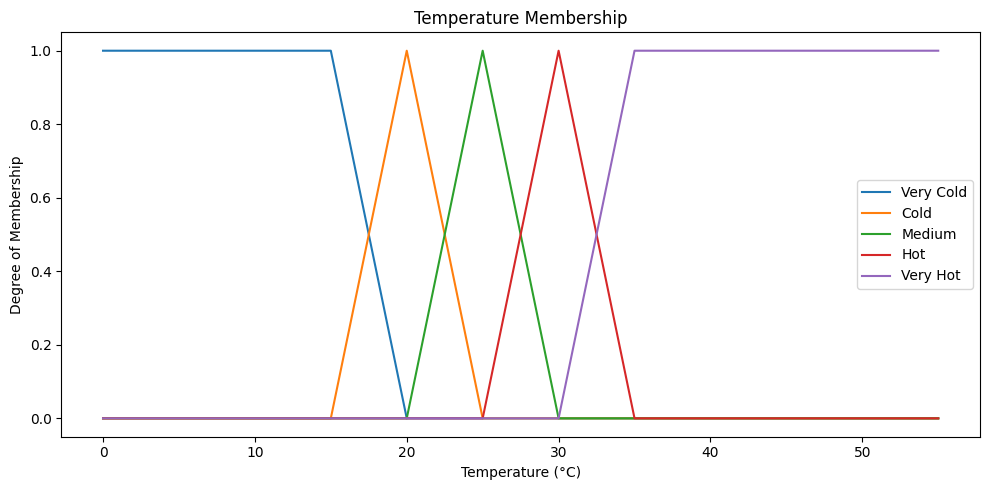

In [22]:
# Plot the membership functions
plt.figure(figsize=(10, 5))

plt.title('Temperature Membership')
plt.plot(temperature, temperature_verycold, label='Very Cold')
plt.plot(temperature, temperature_cold, label='Cold')
plt.plot(temperature, temperature_medium, label='Medium')
plt.plot(temperature, temperature_hot, label='Hot')
plt.plot(temperature, temperature_veryhot, label='Very Hot')

plt.xlabel('Temperature (°C)')
plt.ylabel('Degree of Membership')
plt.legend()

plt.tight_layout()
plt.show()

$$
\mu_{\text{Very Cold}} =
\begin{cases}
   0, & u \geq 20 \\
   1, & u \leq 15 \\
   \frac{20 - u}{20 - 15}, & 15 < u < 20 \\
\end{cases}
$$

$$
\mu_{\text{Cold}} =
\begin{cases}
   0, & 15 \geq u \geq 25 \\
   \frac{u - 15}{20 - 15}, & 15 < u \leq 20 \\
   \frac{25 - u}{25 - 20}, & 20 < u < 25 \\
\end{cases}
$$

$$
\mu_{\text{Medium}} =
\begin{cases}
   0, & 20 \geq u \geq 30 \\
   \frac{u - 20}{25 - 20}, & 20 < u \leq 25 \\
   \frac{30 - u}{30 - 25}, & 25 < u < 30 \\
\end{cases}
$$

$$
\mu_{\text{Hot}} =
\begin{cases}
   0, & 25 \geq u \geq 35 \\
   \frac{u - 25}{30 - 25}, & 25 < u \leq 30 \\
   \frac{35 - u}{35 - 30}, & 30 < u < 35 \\
\end{cases}
$$

$$
\mu_{\text{Very Hot}} =
\begin{cases}
   0, & u \leq 30 \\
   1, & u \geq 35 \\
   \frac{u - 30}{35 - 30}, & 30 < u < 35 \\
\end{cases}
$$

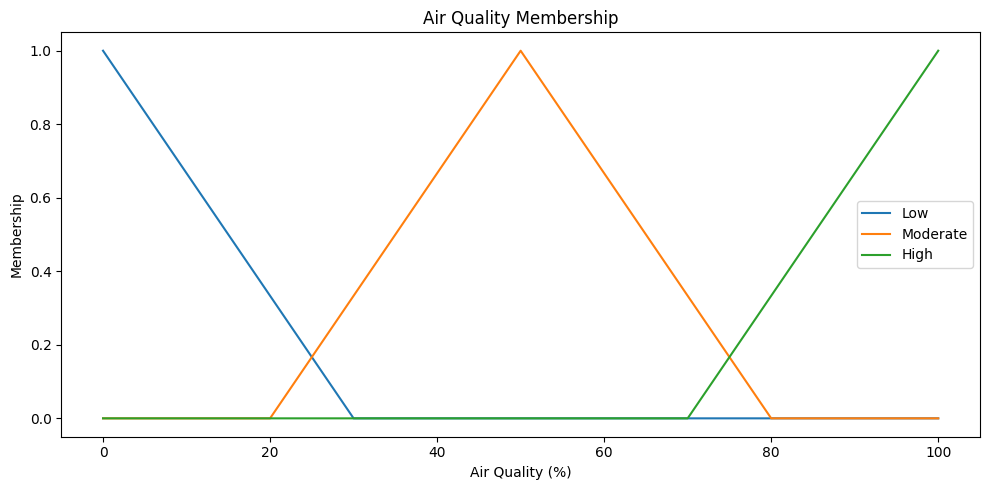

In [23]:
plt.figure(figsize=(10, 5))

plt.title('Air Quality Membership')
plt.plot(air_quality, air_quality_low, label='Low')
plt.plot(air_quality, air_quality_moderate, label='Moderate')
plt.plot(air_quality, air_quality_high, label='High')

plt.xlabel('Air Quality (%)')
plt.ylabel('Membership')
plt.legend()

plt.tight_layout()
plt.show()

$$
\mu_{\text{Low}} =
\begin{cases}
   0, & u \geq 30 \\
   \frac{30 - u}{30}, & 0 \leq u < 30 \\
\end{cases}
$$

$$
\mu_{\text{Moderate}} =
\begin{cases}
   0, & 20 \geq u \geq 80 \\
   \frac{u - 20}{50 - 20}, & 20 < u \leq 50 \\
   \frac{80 - u}{80 - 50}, & 50 < u < 80 \\
\end{cases}
$$

$$
\mu_{\text{High}} =
\begin{cases}
   0, & u \leq 70 \\
   \frac{u - 70}{100 - 70}, & 70 < u \leq 100 \\
\end{cases}
$$

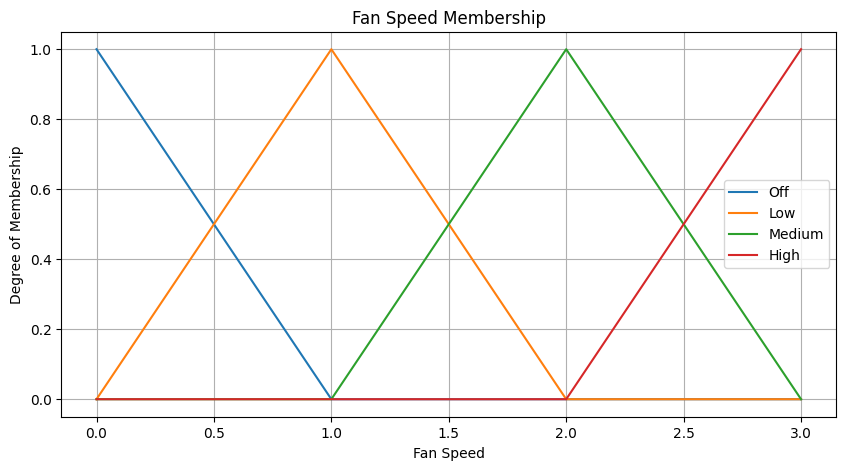

In [24]:
plt.figure(figsize=(10, 5))

plt.title('Fan Speed Membership')
plt.plot(fan_speed, fan_speed_off, label='Off')
plt.plot(fan_speed, fan_speed_low, label='Low')
plt.plot(fan_speed, fan_speed_medium, label='Medium')
plt.plot(fan_speed, fan_speed_high, label='High')

plt.xlabel('Fan Speed')
plt.ylabel('Degree of Membership')
plt.legend()
plt.grid(True)
plt.show()

| Temperature/Air Quality | very cold | cold | medium | hot | very hot |
|:----------------------:|:--------:|:--------:|:--------:|:--------:|:--------:|
|         Low         |   low  |   low  |   medium  | high | high |
|        Moderate     |   low  |   low  |   medium  | high | high |
|         High        |   off  |   off  |   medium  | medium | high |

In [25]:
# Create fuzzy control variables
temp = ctrl.Antecedent(temperature, 'Temperature')
air_qual = ctrl.Antecedent(air_quality, 'Air Quality')
fan = ctrl.Consequent(fan_speed, 'Fan Speed')

# Define fuzzy sets for input variables
temp['Very Cold'] = temperature_verycold
temp['Cold'] = temperature_cold
temp['Medium'] = temperature_medium
temp['Hot'] = temperature_hot
temp['Very Hot'] = temperature_veryhot

air_qual['Low'] = air_quality_low
air_qual['Moderate'] = air_quality_moderate
air_qual['High'] = air_quality_high

# Define fuzzy sets for output variable
fan['Off'] = fan_speed_off
fan['Low'] = fan_speed_low
fan['Medium'] = fan_speed_medium
fan['High'] = fan_speed_high

# Define the rules
rule1 = ctrl.Rule(air_qual['Low'] & temp['Very Cold'], fan['Low'])
rule2 = ctrl.Rule(air_qual['Low'] & temp['Cold'], fan['Low'])
rule3 = ctrl.Rule(air_qual['Low'] & temp['Medium'], fan['Medium'])
rule4 = ctrl.Rule(air_qual['Low'] & temp['Hot'], fan['High'])
rule5 = ctrl.Rule(air_qual['Low'] & temp['Very Hot'], fan['High'])
rule6 = ctrl.Rule(air_qual['Moderate'] & temp['Very Cold'], fan['Low'])
rule7 = ctrl.Rule(air_qual['Moderate'] & temp['Cold'], fan['Low'])
rule8 = ctrl.Rule(air_qual['Moderate'] & temp['Medium'], fan['Medium'])
rule9 = ctrl.Rule(air_qual['Moderate'] & temp['Hot'], fan['High'])
rule10 = ctrl.Rule(air_qual['Moderate'] & temp['Very Hot'], fan['High'])
rule11 = ctrl.Rule(air_qual['High'] & temp['Very Cold'], fan['Off'])
rule12 = ctrl.Rule(air_qual['High'] & temp['Cold'], fan['Off'])
rule13 = ctrl.Rule(air_qual['High'] & temp['Medium'], fan['Medium'])
rule14 = ctrl.Rule(air_qual['High'] & temp['Hot'], fan['Medium'])
rule15 = ctrl.Rule(air_qual['High'] & temp['Very Hot'], fan['High'])

# Create the control system
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])

# Create a control system simulation
fan_sim = ctrl.ControlSystemSimulation(fan_ctrl)

Fan Speed: 1.9999999999999996


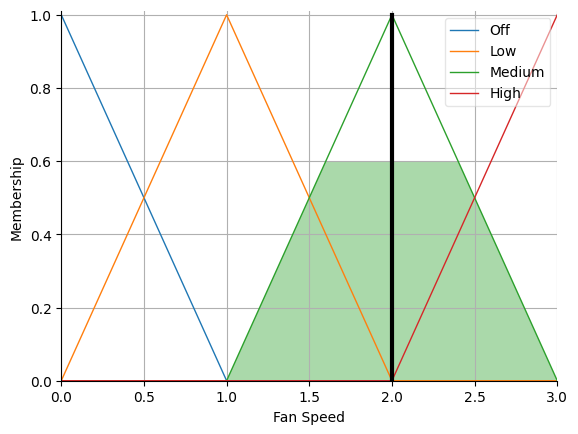

In [28]:
# Input values
fan_sim.input['Temperature'] = 28  # temperature value
fan_sim.input['Air Quality'] = 100  # air quality value

# Calculate the result
fan_sim.compute()

# Print the fan speed
print("Fan Speed:", fan_sim.output['Fan Speed'])

# Plot the result
fan.view(sim=fan_sim)
plt.grid(True)
plt.show()